In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [5]:
import os
DWpath = os.path.join('..','DW')
anagrafica = pd.read_csv(os.path.join(DWpath,'anagraficaVacciniSummaryLatest.csv'))

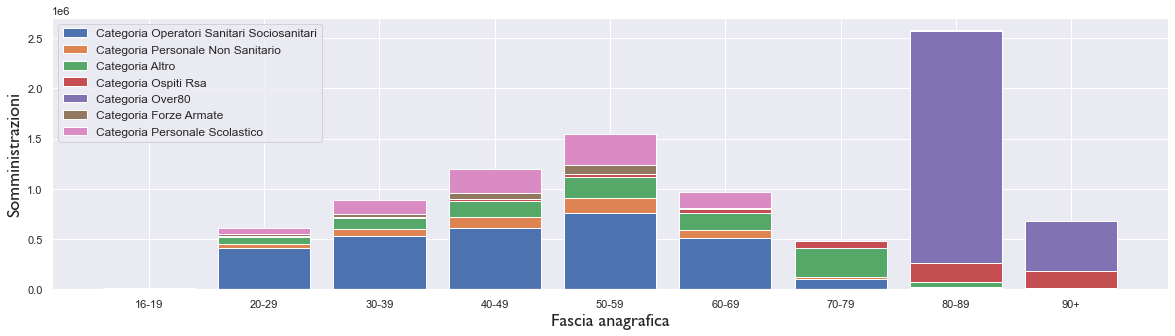

In [64]:
plt.figure(figsize=(20,5))
bottom = np.zeros(len(anagrafica['Fascia Anagrafica']))
for i in range(4,11):
    plt.bar(x=anagrafica['Fascia Anagrafica'], 
            height=anagrafica.iloc[:,i], 
            label=anagrafica.columns[i], 
            bottom=bottom,
           )
    bottom=bottom+anagrafica.iloc[:,i]

plt.xlabel('Fascia anagrafica', fontfamily='Gill Sans', fontsize=18)
plt.ylabel('Somministrazioni', fontfamily='Gill Sans', fontsize=18)
plt.legend(fontsize=12)

In [25]:
anagrafica = anagrafica.drop(columns='Unnamed: 0')

In [26]:
anagrafica

,Fascia Anagrafica,Totale,Sesso Maschile,Sesso Femminile,Categoria Operatori Sanitari Sociosanitari,Categoria Personale Non Sanitario,Categoria Altro,Categoria Ospiti Rsa,Categoria Over80,Categoria Forze Armate,Categoria Personale Scolastico,Prima Dose,Seconda Dose,% Seconda Dose Sul Totale,Platea,% Seconda Dose Assoluta,% Totale Assoluto
0,16-19,9797,4730,5067,4171,686,3480,1272,0,62,126,6758,3039,31.02,2298846,0.13,0.43
1,20-29,614252,219137,395115,412694,41336,68444,10485,0,18964,62329,386852,227400,37.02,6084382,3.74,10.10
2,30-39,889830,348404,541426,527482,69504,108632,13196,0,35020,135996,584457,305373,34.32,6854632,4.45,12.98
3,40-49,1198031,420510,777521,610498,108562,159722,19705,0,64684,234860,822539,375492,31.34,8937229,4.20,13.40
4,50-59,1546955,552399,994556,755865,155341,209667,32203,0,87234,306645,1057543,489412,31.64,9414195,5.20,16.43
5,60-69,966599,456741,509858,511809,76749,167614,38654,0,12550,159223,648989,317610,32.86,7364364,4.31,13.13
6,70-79,480330,268061,212269,103605,15564,288468,69808,0,121,2764,382614,97716,20.34,5968373,1.64,8.05
7,80-89,2577771,1103064,1474707,14698,6802,49259,190818,2315615,336,243,1780063,797708,30.95,3628160,21.99,71.05
8,90+,676217,208070,468147,3047,2207,11652,161096,498094,81,40,439898,236319,34.95,613523,38.52,110.22


In [10]:
import datetime
with open('lastupdate', 'r') as fin:
    lastupdate = fin.read().strip().split('/')
    lastupdate = datetime.date(day=int(lastupdate[2]), month=int(lastupdate[1]), year=int(lastupdate[0]))
    
lastupdate

datetime.date(2021, 3, 31)

In [11]:
lastupdate > datetime.date.today()

False

In [1]:
! ls

Classes.py                         __pycache__
DCIS_POPRES1_25022021122609782.csv covid19-opendata-vaccini
DW                                 grafici.py
ETL.py                             lastupdate
Playground.ipynb                   originalData
README.md                          requirements.txt
ReportVaccinoCOVID_ITA.ipynb       script
__init__.py                        vaccine.py


In [8]:
from Classes import AnalisiRegionale

In [11]:
an = AnalisiRegionale()
an.Analisi()

2021-04-01 22:28:56.708 WARNING root: 
  command:

    streamlit run /Users/alessandrodemela/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]
2021-04-01 22:28:56.865 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


NameError: name 'BarPercSomministrazioni' is not defined

In [14]:
import pandas as pd
import os
somministrazioni = pd.read_csv(os.path.join('DW','somministrazioniVacciniSummaryLatest.csv'))

In [17]:
abitantiRegioni = pd.read_csv('DCIS_POPRES1_25022021122609782.csv')
abitantiRegioni = abitantiRegioni.iloc[:,[1,5,6,9,12]].sort_values(['Territorio','Sesso']
                                                            ).where((abitantiRegioni['Stato civile']=='totale') &
                                                            (abitantiRegioni.Sesso=='totale') &
                                                            (abitantiRegioni.ETA1=='TOTAL')
                                                            ).dropna().iloc[:,[0,-1]].set_index('Territorio')
        # Rename field and indexfor better naming
abitantiRegioni = abitantiRegioni.rename(columns={'Value': 'Abitanti'}).rename_axis('Regione').astype(int)


In [21]:
# Get Relevant Columns
somministrazioniGiornoRegione = somministrazioni.loc[:,['Data Somministrazione','Prima Dose','Seconda Dose','Regione']].groupby(['Regione','Data Somministrazione']).sum()

somministrazioniRegione = somministrazioniGiornoRegione.groupby('Regione').sum()
somministrazioniRegione['Totale'] = somministrazioniRegione.sum(axis=1)
somministrazioniRegione=somministrazioniRegione.join(abitantiRegioni)

somministrazioniRegione['% Somministrazioni'] =  round(100 * somministrazioniRegione['Totale']/somministrazioniRegione['Abitanti'],2)
somministrazioniRegione['% Prima Dose'] =  round(100 * somministrazioniRegione['Prima Dose']/somministrazioniRegione['Abitanti'],2)
somministrazioniRegione['% Seconda Dose'] =  round(100 * somministrazioniRegione['Seconda Dose']/somministrazioniRegione['Abitanti'],2)


In [22]:
somministrazioniRegione

,Prima Dose,Seconda Dose,Totale,Abitanti,% Somministrazioni,% Prima Dose,% Seconda Dose
Regione,,,,,,,
Abruzzo,159722,69797,229519,1293941,17.74,12.34,5.39
Basilicata,63783,33650,97433,553254,17.61,11.53,6.08
Calabria,180737,87946,268683,1894110,14.19,9.54,4.64
Campania,609984,251414,861398,5712143,15.08,10.68,4.40
Emilia-Romagna,582361,294264,876625,4464119,19.64,13.05,6.59
Friuli-Venezia Giulia,153816,79165,232981,1206216,19.32,12.75,6.56
Lazio,751826,303444,1055270,5755700,18.33,13.06,5.27
Liguria,196416,100595,297011,1524826,19.48,12.88,6.60
Lombardia,1113945,521390,1635335,10027602,16.31,11.11,5.20


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

AttributeError: 'list' object has no attribute 'replace'

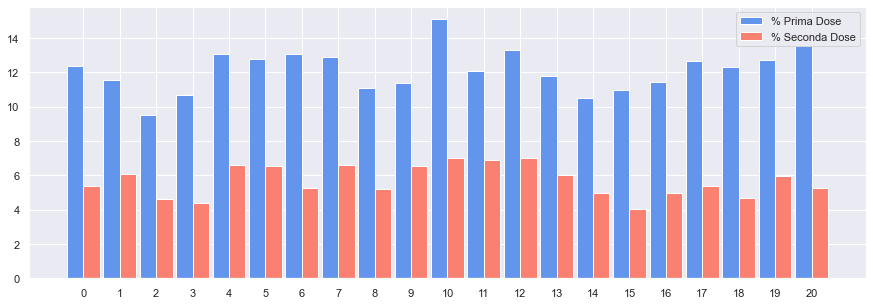

In [65]:
fig, ax = plt.subplots(figsize=(15,5))

x = np.arange(len(somministrazioniRegione.index)) 
width = 0.45
ax.bar(x - width/2, somministrazioniRegione['% Prima Dose'], width, color='cornflowerblue', label='% Prima Dose')
ax.bar(x + width/2, somministrazioniRegione['% Seconda Dose'], width, color='salmon', label='% Seconda Dose')

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(somministrazioniRegione.index, rotation=90)
ax.set_xlim([-1.5*width,len(somministrazioniRegione.index)-.5*width])
ax.set_ylabel('% Somministrazioni/Abitanti')

In [5]:
from ETL import ETL

ImportError: cannot import name 'ETL' from 'ETL' (/Users/alessandrodemela/myCOVID19VaccineAnalysis/ETL.py)

In [3]:
ETL.ETL

NameError: name 'ETL' is not defined

In [13]:
StagingPath='Staging/'
consVacciniLat = pd.read_csv(StagingPath+'consegne.csv')
consVacciniLat = consVacciniLat.rename(columns=createNameMappingDict(consVacciniLat)
                                    ).rename(columns={'Nome Area': 'Regione'} )   
consVacciniLat = consVacciniLat.iloc[:,[1,2,3,4,7]]
consVacciniLat
#consVacciniLat['Data Consegna'] = pd.to_datetime(consVacciniLat['Data Consegna'])

,Area,Fornitore,Numero Dosi,Data Consegna,Codice Regione Istat
0,ABR,Pfizer/BioNTech,135,2020-12-27,13
1,ABR,Pfizer/BioNTech,7800,2020-12-30,13
2,ABR,Pfizer/BioNTech,3900,2021-01-05,13
3,ABR,Pfizer/BioNTech,3900,2021-01-07,13
4,ABR,Pfizer/BioNTech,3900,2021-01-11,13
...,...,...,...,...,...
741,VEN,AstraZeneca,21800,2021-03-25,5
742,VEN,Pfizer/BioNTech,83070,2021-03-29,5
743,VEN,Moderna,39100,2021-04-02,5
744,VEN,AstraZeneca,103300,2021-04-03,5


In [32]:
from datetime import datetime
with open('lastupdate', 'r') as f:
    print(datetime.strptime(f.read(), '%d/%m/%Y').date().strftime('%d/%m/%Y'))

08/04/2021


In [70]:
df

,codice_regione,codice_nuts_1,descrizione_nuts_1,codice_nuts_2,denominazione_regione,sigla_regione,latitudine_regione,longitudine_regione,range_eta,totale_genere_maschile,totale_genere_femminile,totale_generale
0,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,0-15,87423,82474,169897
1,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,16-19,24402,22349,46751
2,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,20-29,67472,62611,130083
3,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,30-39,76472,74241,150713
4,13,ITF,Sud,ITF1,Abruzzo,ABR,42.351222,13.398438,40-49,94745,95315,190060
...,...,...,...,...,...,...,...,...,...,...,...,...
205,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,50-59,399024,400436,799460
206,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,60-69,293238,309972,603210
207,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,70-79,228669,265774,494443
208,5,ITH,Nord-Est,ITH3,Veneto,VEN,45.434905,12.338452,80-89,115439,177591,293030


In [41]:
df = pd.read_csv('Staging/popolazione-istat-regione-range.csv')
df['latitudine_regione'].unique()

array([42.35122196, 40.63947052, 46.49933453, 38.90597598, 40.83956555,
       44.49436681, 45.6494354 , 41.89277044, 44.41149315, 45.46679409,
       43.61675973, 41.55774754, 45.0732745 , 41.12559576, 39.21531192,
       38.11569725, 43.76923077, 46.06893511, 43.10675841, 45.73750286,
       45.43490485])

In [56]:
pd.DataFrame([df['latitudine_regione'].unique(),df['longitudine_regione'].unique()])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,42.351222,40.639471,46.499335,38.905976,40.839566,44.494367,45.649435,41.892770,44.411493,45.466794,43.616760,41.557748,45.073274,41.125596,39.215312,38.115697,43.769231,46.068935,43.106758,45.737503,45.434905
1,13.398438,15.805148,11.356624,16.594402,14.250850,11.341721,13.768136,12.483667,8.932699,9.190347,13.518875,14.659161,7.680687,16.867367,9.110616,13.362357,11.255889,11.121231,12.388247,7.320149,12.338452


In [85]:
pd.concat([pd.DataFrame(df['denominazione_regione'].unique(), columns=['Regione']),
          pd.DataFrame(df['latitudine_regione'].unique(), columns=['lat']),
          pd.DataFrame(df['longitudine_regione'].unique(), columns=['lon'])],
          axis=1,
         )

,Regione,lat,lon
0,Abruzzo,42.351222,13.398438
1,Basilicata,40.639471,15.805148
2,Bolzano,46.499335,11.356624
3,Calabria,38.905976,16.594402
4,Campania,40.839566,14.250850
5,Emilia-Romagna,44.494367,11.341721
6,Friuli Venezia Giulia,45.649435,13.768136
7,Lazio,41.892770,12.483667
8,Liguria,44.411493,8.932699
9,Lombardia,45.466794,9.190347


In [131]:
DWpath='DW'
__somministrazioni = pd.read_csv(os.path.join(DWpath,'somministrazioniSummary.csv'))
__location = pd.read_csv(os.path.join(DWpath,'coordinateRegioni.csv'))
__abitanti = pd.read_csv(os.path.join(DWpath,'abitantiRegioni.csv'))

In [132]:
__location

,Unnamed: 0,Regione,lat,lon
0,0,Abruzzo,42.351222,13.398438
1,1,Basilicata,40.639471,15.805148
2,2,Bolzano,46.499335,11.356624
3,3,Calabria,38.905976,16.594402
4,4,Campania,40.839566,14.250850
5,5,Emilia-Romagna,44.494367,11.341721
6,6,Friuli Venezia Giulia,45.649435,13.768136
7,7,Lazio,41.892770,12.483667
8,8,Liguria,44.411493,8.932699
9,9,Lombardia,45.466794,9.190347


In [126]:
__abitanti

,Regione,Abitanti
0,Abruzzo,1293941
1,Basilicata,553254
2,Calabria,1894110
3,Campania,5712143
4,Centro,11831092
5,Emilia-Romagna,4464119
6,Friuli-Venezia Giulia,1206216
7,Isole,6486911
8,Italia,59641488
9,Lazio,5755700


In [113]:
__location['Regione'].map(mapRegioni)

0                                Abruzzo
1                             Basilicata
2                               Calabria
3                               Campania
4                                 Centro
5                         Emilia-Romagna
6                  Friuli-Venezia Giulia
7                                  Isole
8                                 Italia
9                                  Lazio
10                               Liguria
11                             Lombardia
12                                Marche
13                                Molise
14                                  Nord
15                              Nord-est
16                            Nord-ovest
17                              Piemonte
18    Provincia Autonoma Bolzano / Bozen
19             Provincia Autonoma Trento
20                                Puglia
Name: Regione, dtype: object

In [112]:
mapRegioni={i : j for i,j in zip(__location['Regione'],__abitanti['Regione'])}
mapRegioni

{'Abruzzo': 'Abruzzo',
 'Basilicata': 'Basilicata',
 'Bolzano': 'Calabria',
 'Calabria': 'Campania',
 'Campania': 'Centro',
 'Emilia-Romagna': 'Emilia-Romagna',
 'Friuli Venezia Giulia': 'Friuli-Venezia Giulia',
 'Lazio': 'Isole',
 'Liguria': 'Italia',
 'Lombardia': 'Lazio',
 'Marche': 'Liguria',
 'Molise': 'Lombardia',
 'Piemonte': 'Marche',
 'Puglia': 'Molise',
 'Sardegna': 'Nord',
 'Sicilia': 'Nord-est',
 'Toscana': 'Nord-ovest',
 'Trento': 'Piemonte',
 'Umbria': 'Provincia Autonoma Bolzano / Bozen',
 "Valle d'Aosta": 'Provincia Autonoma Trento',
 'Veneto': 'Puglia'}

In [156]:
abitantiRegioni = pd.read_csv('DCIS_POPRES1_25022021122609782.csv')
abitantiRegioni = abitantiRegioni.iloc[:,[1,5,6,9,12]].sort_values(['Territorio','Sesso']
                                                    ).where((abitantiRegioni['Stato civile']=='totale') &
                                                    (abitantiRegioni.Sesso=='totale') &
                                                    (abitantiRegioni.ETA1=='TOTAL')
                                                    ).dropna().iloc[:,[0,-1]].set_index('Territorio')
# Rename field and indexfor better naming
abitantiRegioni = abitantiRegioni.rename(columns={'Value': 'Abitanti'}).rename_axis('Regione').astype(int)
abitantiRegioni.to_csv(DWPath+'abitantiRegioni.csv')

# Coordinate Regioni
coordinateRegioni = pd.read_csv('Staging/popolazione-istat-regione-range.csv',index_col=0)
coordinateRegioni = pd.concat(
    [pd.DataFrame(coordinateRegioni['denominazione_regione'].unique(), columns=['Regione']),
    pd.DataFrame(coordinateRegioni['latitudine_regione'].unique(), columns=['lat']),
    pd.DataFrame(coordinateRegioni['longitudine_regione'].unique(), columns=['lon'])],
    axis=1,
 )
mapRegioni={i : j for i,j in zip(coordinateRegioni['Regione'],abitantiRegioni.index)}
coordinateRegioni['Regione'] = coordinateRegioni['Regione'].map(mapRegioni)
coordinateRegioni = coordinateRegioni.set_index('Regione')
regioniInfo = coordinateRegioni.join(abitantiRegioni)

regioniInfo.to_csv(DWPath+'regioniInfo.csv')

In [163]:
__somministrazioni = pd.read_csv(os.path.join(DWpath,'somministrazioniSummary.csv')).drop(columns='Unnamed: 0')
__regioniInfo = pd.read_csv(os.path.join(DWpath,'regioniInfo.csv'))

In [165]:
__somministrazioni.set_index('Regione')

,Data Somministrazione,Totale,Sesso Maschile,Sesso Femminile,Categoria Operatori Sanitari Sociosanitari,Categoria Personale Non Sanitario,Categoria Altro,Categoria Ospiti Rsa,Categoria Over80,Categoria Forze Armate,Categoria Personale Scolastico,Prima Dose,Seconda Dose
Regione,,,,,,,,,,,,,
Abruzzo,2020-12-27,37,19,18,34,0,1,2,0,0,0,37,0
Basilicata,2020-12-27,106,41,65,104,0,2,0,0,0,0,106,0
Calabria,2020-12-27,275,150,125,274,0,1,0,0,0,0,275,0
Campania,2020-12-27,720,422,298,703,14,3,0,0,0,0,720,0
Emilia-Romagna,2020-12-27,968,372,596,824,1,117,26,0,0,0,968,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sicilia,2021-04-08,10620,5238,5382,490,84,6830,299,2794,62,61,5347,5273
Toscana,2021-04-08,15225,6504,8721,163,233,3424,66,11325,11,3,11419,3806
Umbria,2021-04-08,3374,1440,1934,183,11,776,149,2248,5,2,2195,1179


In [195]:
__regioniInfo

,Regione,lat,lon,Abitanti
0,Abruzzo,42.351222,13.398438,1293941
1,Basilicata,40.639471,15.805148,553254
2,Calabria,46.499335,11.356624,1894110
3,Campania,38.905976,16.594402,5712143
4,Centro,40.839566,14.250850,11831092
5,Emilia-Romagna,44.494367,11.341721,4464119
6,Friuli-Venezia Giulia,45.649435,13.768136,1206216
7,Isole,41.892770,12.483667,6486911
8,Italia,44.411493,8.932699,59641488
9,Lazio,45.466794,9.190347,5755700


In [199]:
somministrazioniRegione.merge(__regioniInfo)

,Regione,Prima Dose,Seconda Dose,Totale,lat,lon,Abitanti
0,Abruzzo,185206,81002,266208,42.351222,13.398438,1293941
1,Basilicata,71778,36120,107898,40.639471,15.805148,553254
2,Calabria,205978,108650,314628,46.499335,11.356624,1894110
3,Campania,727421,275287,1002708,38.905976,16.594402,5712143
4,Emilia-Romagna,688566,322362,1010928,44.494367,11.341721,4464119
5,Friuli-Venezia Giulia,180171,85500,265671,45.649435,13.768136,1206216
6,Lazio,871452,351850,1223302,45.466794,9.190347,5755700
7,Liguria,247847,113775,361622,43.616760,13.518875,1524826
8,Lombardia,1294499,615791,1910290,41.557748,14.659161,10027602
9,Marche,214368,106714,321082,45.073274,7.680687,1512672


In [212]:
totaleRange=pd.read_csv('Staging/popolazione-istat-regione-range.csv')
totaleRange = totaleRange.groupby('range_eta').sum().reset_index().loc[1:,['range_eta','totale_generale']]
totaleRange

,range_eta,totale_generale
1,16-19,2298846
2,20-29,6084382
3,30-39,6854632
4,40-49,8937229
5,50-59,9414195
6,60-69,7364364
7,70-79,5968373
8,80-89,3628160
9,90+,791543


In [215]:
somministrazioni = pd.read_csv('Staging/somministrazioni.csv')

In [218]:
def createNameMappingDict(df):
        '''This function returns a dictionary which helps mapping columns names in a DataFrame'''
        nameMappingDict = {oldName : oldName.replace('_',' ').title() for oldName in df.columns}
        
        return nameMappingDict

In [234]:
somministrazioni = pd.read_csv('Staging/somministrazioni.csv')
somministrazioni = somministrazioni.rename(columns=createNameMappingDict(somministrazioni)).rename({'Nome Area': 'Regione'})
somministrazioni.drop(columns=['Area', 'Codice Nuts1', 'Codice Nuts2', 'Codice Regione Istat'], inplace=True)
somministrazioni['Data Somministrazione'] = pd.to_datetime(somministrazioni['Data Somministrazione']).dt.date
somministrazioni['Totale'] = somministrazioni['Prima Dose'] + somministrazioni['Seconda Dose']

somministrazioni


,Data Somministrazione,Fornitore,Fascia Anagrafica,Sesso Maschile,Sesso Femminile,Categoria Operatori Sanitari Sociosanitari,Categoria Personale Non Sanitario,Categoria Ospiti Rsa,Categoria Over80,Categoria Forze Armate,Categoria Personale Scolastico,Categoria Altro,Prima Dose,Seconda Dose,Nome Area,Totale
0,2020-12-27,Pfizer/BioNTech,20-29,1,0,1,0,0,0,0,0,0,1,0,Abruzzo,1
1,2020-12-27,Pfizer/BioNTech,30-39,1,3,4,0,0,0,0,0,0,4,0,Abruzzo,4
2,2020-12-27,Pfizer/BioNTech,40-49,1,6,7,0,0,0,0,0,0,7,0,Abruzzo,7
3,2020-12-27,Pfizer/BioNTech,50-59,4,5,9,0,0,0,0,0,0,9,0,Abruzzo,9
4,2020-12-27,Pfizer/BioNTech,60-69,10,4,13,0,0,0,0,0,1,14,0,Abruzzo,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32221,2021-04-09,Pfizer/BioNTech,50-59,295,370,143,6,5,0,11,21,479,366,299,Veneto,665
32222,2021-04-09,Pfizer/BioNTech,60-69,416,358,67,3,0,0,1,14,689,577,197,Veneto,774
32223,2021-04-09,Pfizer/BioNTech,70-79,1001,1003,6,1,10,0,0,0,1987,1900,104,Veneto,2004
32224,2021-04-09,Pfizer/BioNTech,80-89,1594,2244,2,2,61,3140,0,0,633,1762,2076,Veneto,3838
